In [24]:
# import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [25]:
# input data & Exploratory Data Analysis
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

## create copy
df = train_data.copy()

print(df.head())
print ('-'*5)
print(df.info())
print ('-'*5)
print(df.describe())
print ('-'*5)
print(test_data.head())
print ('-'*5)
print(test_data.info())
print ('-'*5)
print(test_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

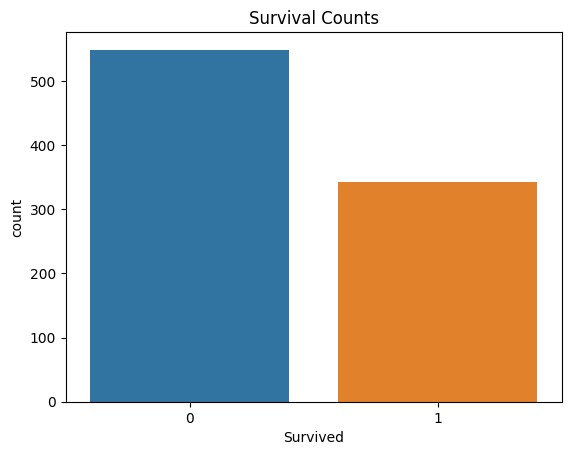

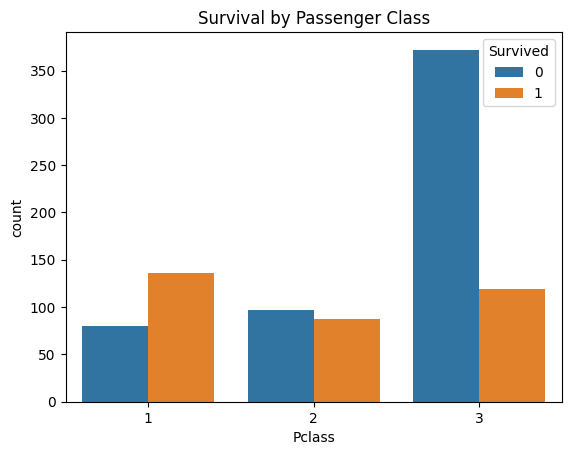

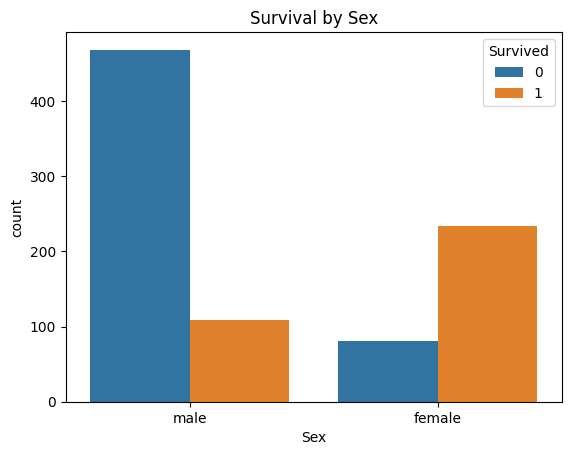

In [26]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

In [27]:
# Data Preprocessing
## check missing value
print('train')
print(df.isnull().sum())
print('-'*5)

print('test')
print(test_data.isnull().sum())
print('-'*5)

df.describe(include = 'all')

train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----
test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
-----


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
### fill Age, Fare with median
### fill Embarked with mode
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
test_data['Age'] = test_data['Age'].fillna(df['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(df['Fare'].median())

### drop unnecessary features
df.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True)
#### another drop form
test_data = test_data.drop('PassengerId', axis=1)
test_data = test_data.drop('Name', axis=1)
test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Ticket', axis=1)

In [29]:
## check preprocessed data
print(df.isnull().sum())
print("-"*5)
print(test_data.isnull().sum())
print("-"*5)
print(df.head())
print("-"*5)
print(test_data.head())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
-----
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
-----
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
-----
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [30]:
# Feature Engineering

In [31]:
## transform categorical data into numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [32]:
## feature selection

df['Family'] = df['SibSp'] + df['Parch'] + 1
test_data['Family'] = df['SibSp'] + df['Parch'] + 1


features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']
print (X)
print ('-'*5)
print (y)

     Pclass  Sex   Age  Family     Fare  Embarked
0         3    1  22.0       2   7.2500         2
1         1    0  38.0       2  71.2833         0
2         3    0  26.0       1   7.9250         2
3         1    0  35.0       2  53.1000         2
4         3    1  35.0       1   8.0500         2
..      ...  ...   ...     ...      ...       ...
886       2    1  27.0       1  13.0000         2
887       1    0  19.0       1  30.0000         2
888       3    0  28.0       4  23.4500         2
889       1    1  26.0       1  30.0000         0
890       3    1  32.0       1   7.7500         1

[891 rows x 6 columns]
-----
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [33]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [34]:
### data train
print (X_train)
print ('-'*5)
print (y_train)

     Pclass  Sex   Age  Family     Fare  Embarked
301       3    1  28.0       3  23.2500         1
309       1    0  30.0       1  56.9292         0
516       2    0  34.0       1  10.5000         2
120       2    1  21.0       3  73.5000         2
570       2    1  62.0       1  10.5000         2
..      ...  ...   ...     ...      ...       ...
715       3    1  19.0       1   7.6500         2
767       3    0  30.5       1   7.7500         1
72        2    1  21.0       1  73.5000         2
235       3    0  28.0       1   7.5500         2
37        3    1  21.0       1   8.0500         2

[712 rows x 6 columns]
-----
301    1
309    1
516    1
120    0
570    1
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 712, dtype: int64


In [35]:
### data test
print (X_test)
print ('-'*5)
print (y_test)

     Pclass  Sex   Age  Family     Fare  Embarked
862       1    0  48.0       1  25.9292         2
223       3    1  28.0       1   7.8958         2
84        2    0  17.0       1  10.5000         2
680       3    0  28.0       1   8.1375         1
535       2    0   7.0       3  26.2500         2
..      ...  ...   ...     ...      ...       ...
796       1    0  49.0       1  25.9292         2
815       1    1  28.0       1   0.0000         2
629       3    1  28.0       1   7.7333         1
421       3    1  21.0       1   7.7333         1
448       3    0   5.0       4  19.2583         0

[179 rows x 6 columns]
-----
862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64


In [36]:
# Modeling

In [37]:
## Build Classification Model with Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [38]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
## prediction
y_prediction = model.predict(X_test)
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_prediction
})
df_comparison

,Actual,Predicted
862,1,1
223,0,0
84,1,1
680,0,1
535,1,1
...,...,...
796,1,1
815,0,0
629,0,0
421,0,0


In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[94 12]
 [28 45]]


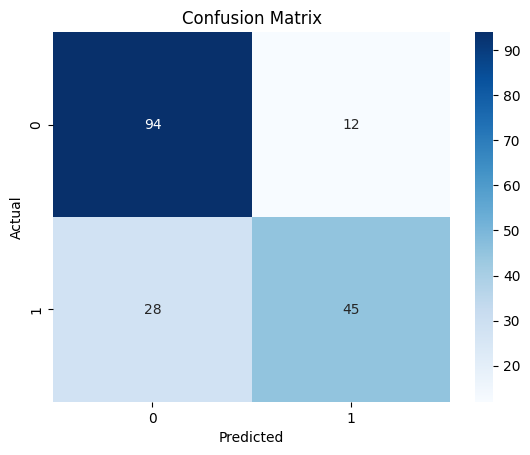

-----
Accuracy: 0.78


In [40]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('-'*5)

#accuracy
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy:.2f}")

In [41]:
# Feature Importances - Random Forest only
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
2,Age,0.271690
1,Sex,0.264219
4,Fare,0.257493
0,Pclass,0.090910
3,Family,0.082353
5,Embarked,0.033336
